<a href="https://colab.research.google.com/github/Alexgs9/Proyecto-final-Sem-Bas-En-Con/blob/main/Kmeans_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [ ]:
url = "https://raw.githubusercontent.com/AliVGaribay/Proyecto-Final/main/Employee.csv" #Employee
#url = "https://raw.githubusercontent.com/AliVGaribay/Proyecto-Final/main/heart.csv" #heart
#url = "https://raw.githubusercontent.com/AliVGaribay/Proyecto-Final/main/zoo.csv" #zoo

dataset = pd.read_csv(url)

In [ ]:
def convertir_a_numericos(dataset):
    # Crea una copia del conjunto de datos para evitar modificar el original
    dataset_copia = dataset.copy()

    # Itera sobre todas las columnas del conjunto de datos
    for columna in dataset_copia.columns:
        # Verifica si el tipo de datos de la columna es objeto (cadena u otro tipo no numérico)
        if dataset_copia[columna].dtype == 'object':
            # Utiliza LabelEncoder para convertir las etiquetas de texto a valores numéricos
            label_encoder = LabelEncoder()
            dataset_copia[columna] = label_encoder.fit_transform(dataset_copia[columna])

    return dataset_copia

dataset = convertir_a_numericos(dataset)

In [ ]:
def crear_copia_sin_clase(dataset):
    # Crea una copia del conjunto de datos sin la última columna (variable objetivo)
    dataset_copia_sin_clase = dataset.iloc[:, :-1].copy()
    return dataset_copia_sin_clase

# Crea una copia del dataset sin la última columna
dataset_copia_sin_clase = crear_copia_sin_clase(dataset)

In [ ]:
def normalizar_atributos(dataset):
    # Selecciona todas las columnas excepto la última (asumiendo que la última es la variable objetivo)
    atributos = dataset.iloc[:, :-1].values

    # Utiliza StandardScaler para normalizar los atributos
    scaler = StandardScaler()
    atributos_normalizados = scaler.fit_transform(atributos)

    # Reemplaza las columnas originales con las versiones normalizadas
    for i in range(atributos_normalizados.shape[1]):
        nombre_columna = dataset.columns[i]
        dataset[nombre_columna] = atributos_normalizados[:, i]

    return dataset

    dataset = normalizar_atributos(dataset)

In [ ]:
silhouette = 0

In [ ]:
def k_means(dataset, k, max_iter=100):
    # Se denota que se usara la variable global para almacenar el resultado de la evaluacion de silhouette
    global silhouette

    # Se almacena los valores del dataset como una matriz para simplificar las operaciones
    datos = dataset.values

    # Seleccionar aleatoriamente k centroides iniciales
    centroides = datos[np.random.choice(datos.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Calcular las distancias entre cada punto y cada centroide a modo de operacion de matrices, de ahi la segunda linea de la funcion
        distancias = np.linalg.norm(datos[:, np.newaxis] - centroides, axis=2)

        # Se asigna cada punto al clúster del centroide más cercano
        asignaciones = np.argmin(distancias, axis=1)

        # Se calculan los nuevos centroides
        nuevos_centroides = np.array([datos[asignaciones == j].mean(axis=0) for j in range(k)])

        # Se revisa si existe un cambio en los centroides, de lo contrario se termina la iteracion
        if np.array_equal(centroides, nuevos_centroides):
            break

        centroides = nuevos_centroides

    # Se realiza la evaluacion de silhouete
    silhouette = silhouette_score(datos, asignaciones)

    return centroides, asignaciones

In [ ]:
def plot_resultado(dataset, centroides, asignaciones):
    clases_unicas = dataset.iloc[:, -1].unique()
    colores_cluster = plt.cm.viridis(np.linspace(0, 1, len(np.unique(asignaciones))))

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, clase in enumerate(clases_unicas):
        # Filtrar los datos por clase
        datos_clase = dataset[dataset.iloc[:, -1] == clase]

        # Obtener índices de los puntos en la clase actual
        indices_clase = datos_clase.index

        # Plotear puntos en la clase actual con colores distintos para cada clúster
        for j, indice in enumerate(indices_clase):
            color = colores_cluster[asignaciones[indice]]
            ax.scatter(
                j,  # Número de instancia en el eje x
                i,  # Clase en el eje y
                color=color,
                edgecolors=color,
                s=100,  # Tamaño del punto
                linewidth=1,  # Grosor del borde
                label=f'Cluster {asignaciones[indice]}' if j == 0 else ""
            )

    # Ajustar las etiquetas y leyenda
    ax.set_xticks(range(len(dataset)))
    ax.set_xticklabels(range(1, len(dataset) + 1))
    ax.set_yticks(range(len(clases_unicas)))
    ax.set_yticklabels(clases_unicas)
    ax.set_xlabel('Número de Instancia')
    ax.set_ylabel('Clase')
    ax.legend()

    plt.title('Clase y Cluster Plot')
    plt.show()

In [ ]:
centroides, asignaciones = k_means(dataset_copia_sin_clase, 2)

In [ ]:
print(f"{silhouette}")

0.5310323132765913


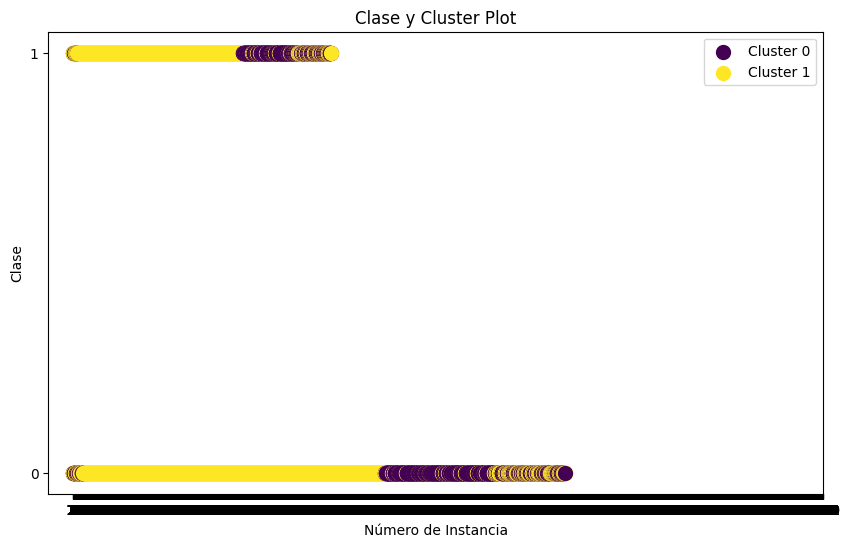

In [ ]:
plot_resultado(dataset, centroides, asignaciones)